# Chapter 3 Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv('pva97nk_ch2_result.csv')
df.head()

,TargetB,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,GiftTimeLast,GiftTimeFirst,PromCnt12,PromCnt36,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCat96NK,StatusCatStarAll,DemCluster,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemPctVeterans,DemMedIncome
0,0.0,2.0,4.0,1.0,3.0,17.0,13.50,9.25,17.00,21.0,66.0,8.0,17.0,26.0,3.0,8.0,13.0,b'A',0.0,b'00',NaN,b'F',b'U',0.0,0.0,NaN
1,0.0,1.0,8.0,0.0,3.0,20.0,20.00,15.88,NaN,26.0,92.0,14.0,35.0,79.0,5.0,5.0,24.0,b'A',0.0,b'23',67.0,b'F',b'U',186800.0,85.0,NaN
2,1.0,6.0,41.0,3.0,20.0,6.0,5.17,3.73,5.00,18.0,111.0,12.0,23.0,51.0,5.0,11.0,22.0,b'S',1.0,b'00',NaN,b'M',b'U',87600.0,36.0,38750.0
3,1.0,3.0,12.0,3.0,8.0,10.0,8.67,8.50,8.67,9.0,93.0,14.0,22.0,44.0,2.0,6.0,16.0,b'E',1.0,b'00',NaN,b'M',b'U',139200.0,27.0,38942.0
4,0.0,1.0,1.0,1.0,1.0,20.0,20.00,20.00,20.00,21.0,21.0,10.0,15.0,13.0,4.0,7.0,6.0,b'F',0.0,b'35',53.0,b'M',b'U',168100.0,37.0,71509.0


In [2]:
df.shape
# Note that we dropped column TargetD and ID accoring to Chapter 2.
# Thus, the number of column of pva97nk dataframe we use here only have 26 columns, not 28.

(9686, 26)

# Chaning values of object variables into numeric
Note that Python Decision Tree cannot handle object values. 
Thus, we have to convert object values into numeric values. 
(i.e, categroy a --> 1, category b --> 2, ...)

In [3]:
df.dtypes

TargetB             float64
GiftCnt36           float64
GiftCntAll          float64
GiftCntCard36       float64
GiftCntCardAll      float64
GiftAvgLast         float64
GiftAvg36           float64
GiftAvgAll          float64
GiftAvgCard36       float64
GiftTimeLast        float64
GiftTimeFirst       float64
PromCnt12           float64
PromCnt36           float64
PromCntAll          float64
PromCntCard12       float64
PromCntCard36       float64
PromCntCardAll      float64
StatusCat96NK        object
StatusCatStarAll    float64
DemCluster           object
DemAge              float64
DemGender            object
DemHomeOwner         object
DemMedHomeValue     float64
DemPctVeterans      float64
DemMedIncome        float64
dtype: object

In [4]:
df["StatusCat96NK"].value_counts(dropna=False)

b'A'    5826
b'S'    2365
b'F'     660
b'N'     574
b'E'     227
b'L'      34
Name: StatusCat96NK, dtype: int64

In [5]:
df["StatusCat96NK"]= df["StatusCat96NK"].replace("b'A'", 1).replace("b'S'", 2).replace("b'F'",3)\
.replace("b'N'",4).replace("b'E'",5).replace("b'L'",6)
df["StatusCat96NK"].value_counts(dropna=False)

1    5826
2    2365
3     660
4     574
5     227
6      34
Name: StatusCat96NK, dtype: int64

In [6]:
df["DemGender"].value_counts(dropna=False)

b'F'    5223
b'M'    3925
b'U'     538
Name: DemGender, dtype: int64

In [7]:
df["DemGender"]= df["DemGender"].replace("b'F'",1).replace("b'M'",2).replace("b'U'",3)
df["DemGender"].value_counts(dropna=False)

1    5223
2    3925
3     538
Name: DemGender, dtype: int64

In [8]:
df["DemHomeOwner"].value_counts(dropna=False)

b'H'    5377
b'U'    4309
Name: DemHomeOwner, dtype: int64

In [9]:
df["DemHomeOwner"]= df["DemHomeOwner"].replace("b'H'",1).replace("b'U'",2)
df["DemHomeOwner"].value_counts(dropna=False)

1    5377
2    4309
Name: DemHomeOwner, dtype: int64

In [10]:
df["DemCluster"].value_counts(dropna=False)

b'40'    432
b'36'    401
b'24'    401
b'35'    384
b'27'    331
b'12'    323
b'49'    323
b'18'    321
b'13'    309
b'30'    262
b'14'    248
b'39'    242
b'00'    240
b'11'    236
b'45'    228
b'43'    227
b'51'    220
b'16'    201
b'41'    197
b'46'    196
b'28'    194
b'02'    191
b'44'    185
b'08'    182
b'17'    178
b'10'    175
b'20'    171
b'21'    165
b'53'    158
b'03'    153
b'42'    140
b'25'    135
b'34'    132
b'23'    131
b'22'    125
b'31'    125
b'01'    121
b'38'    118
b'15'    108
b'26'    100
b'37'     99
b'48'     96
b'05'     95
b'47'     86
b'07'     78
b'29'     73
b'32'     72
b'50'     70
b'09'     70
b'06'     53
b'33'     52
b'04'     51
b'19'     50
b'52'     32
Name: DemCluster, dtype: int64

In [11]:
df['DemCluster'].head()

0    b'00'
1    b'23'
2    b'00'
3    b'00'
4    b'35'
Name: DemCluster, dtype: object

In [12]:
df['DemCluster']=df['DemCluster'].str[2:4]


In [13]:
df.dtypes

TargetB             float64
GiftCnt36           float64
GiftCntAll          float64
GiftCntCard36       float64
GiftCntCardAll      float64
GiftAvgLast         float64
GiftAvg36           float64
GiftAvgAll          float64
GiftAvgCard36       float64
GiftTimeLast        float64
GiftTimeFirst       float64
PromCnt12           float64
PromCnt36           float64
PromCntAll          float64
PromCntCard12       float64
PromCntCard36       float64
PromCntCardAll      float64
StatusCat96NK         int64
StatusCatStarAll    float64
DemCluster           object
DemAge              float64
DemGender             int64
DemHomeOwner          int64
DemMedHomeValue     float64
DemPctVeterans      float64
DemMedIncome        float64
dtype: object

In [14]:
# Another way to trim DemCluster
df['DemCluster'] = [x[:-1] for x in df['DemCluster']] # erase the last character of each value
df['DemCluster'] = [x[-2:] for x in df['DemCluster']] # erase the first two characters of each value
df['DemCluster'] = df['DemCluster'].replace("00",0)
df["DemCluster"].value_counts(dropna=False)
# We can confirm that dtype of df["DemCluster"] is int64 according to the following result.

1    2149
4    2110
3    1887
2    1826
0    1234
5     480
Name: DemCluster, dtype: int64

In [15]:
### Making object dtypes into categorical variables.
### This process may not be needed, But, I did it to make sure that the following four columns' dtyps are category.
df['StatusCat96NK'] = df['StatusCat96NK'].astype('category')
df['DemCluster'] = df['DemCluster'].astype('category')
df['DemGender'] = df['DemGender'].astype('category')
df['DemHomeOwner'] = df['DemHomeOwner'].astype('category')

In [16]:
df['DemCluster'].head()

0    0
1    2
2    0
3    0
4    3
Name: DemCluster, dtype: category
Categories (6, object): [0, 1, 2, 3, 4, 5]

In [17]:
df.dtypes

TargetB              float64
GiftCnt36            float64
GiftCntAll           float64
GiftCntCard36        float64
GiftCntCardAll       float64
GiftAvgLast          float64
GiftAvg36            float64
GiftAvgAll           float64
GiftAvgCard36        float64
GiftTimeLast         float64
GiftTimeFirst        float64
PromCnt12            float64
PromCnt36            float64
PromCntAll           float64
PromCntCard12        float64
PromCntCard36        float64
PromCntCardAll       float64
StatusCat96NK       category
StatusCatStarAll     float64
DemCluster          category
DemAge               float64
DemGender           category
DemHomeOwner        category
DemMedHomeValue      float64
DemPctVeterans       float64
DemMedIncome         float64
dtype: object

# Creating Training and Validation Data (P 3-23: 3-26)

In [18]:
df1= df.copy()

data = df1.drop(['TargetB'], axis=1)
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 25 columns):
GiftCnt36           9686 non-null float64
GiftCntAll          9686 non-null float64
GiftCntCard36       9686 non-null float64
GiftCntCardAll      9686 non-null float64
GiftAvgLast         9686 non-null float64
GiftAvg36           9686 non-null float64
GiftAvgAll          9686 non-null float64
GiftAvgCard36       7906 non-null float64
GiftTimeLast        9686 non-null float64
GiftTimeFirst       9686 non-null float64
PromCnt12           9686 non-null float64
PromCnt36           9686 non-null float64
PromCntAll          9686 non-null float64
PromCntCard12       9686 non-null float64
PromCntCard36       9686 non-null float64
PromCntCardAll      9686 non-null float64
StatusCat96NK       9686 non-null category
StatusCatStarAll    9686 non-null float64
DemCluster          9686 non-null category
DemAge              7279 non-null float64
DemGender           9686 non-null category
DemHomeO

,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,GiftTimeLast,GiftTimeFirst,PromCnt12,PromCnt36,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCat96NK,StatusCatStarAll,DemCluster,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemPctVeterans,DemMedIncome
0,2.0,4.0,1.0,3.0,17.0,13.50,9.25,17.00,21.0,66.0,8.0,17.0,26.0,3.0,8.0,13.0,1,0.0,0,NaN,1,2,0.0,0.0,NaN
1,1.0,8.0,0.0,3.0,20.0,20.00,15.88,NaN,26.0,92.0,14.0,35.0,79.0,5.0,5.0,24.0,1,0.0,2,67.0,1,2,186800.0,85.0,NaN
2,6.0,41.0,3.0,20.0,6.0,5.17,3.73,5.00,18.0,111.0,12.0,23.0,51.0,5.0,11.0,22.0,2,1.0,0,NaN,2,2,87600.0,36.0,38750.0
3,3.0,12.0,3.0,8.0,10.0,8.67,8.50,8.67,9.0,93.0,14.0,22.0,44.0,2.0,6.0,16.0,5,1.0,0,NaN,2,2,139200.0,27.0,38942.0
4,1.0,1.0,1.0,1.0,20.0,20.00,20.00,20.00,21.0,21.0,10.0,15.0,13.0,4.0,7.0,6.0,3,0.0,3,53.0,2,2,168100.0,37.0,71509.0


In [19]:
# Create the target series
target = df1['TargetB']
target.head()

0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: TargetB, dtype: float64

In [20]:
###5:5 data partion
import sklearn
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data, target, test_size=0.5, random_state=42)

In [21]:
print("X_train shape:", X_train.shape) 
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape) 
print("y_test shape:", y_test.shape)

X_train shape: (4843, 25)
y_train shape: (4843,)
X_test shape: (4843, 25)
y_test shape: (4843,)


#### Creating the Maximal Tree (P 3-55)

In [22]:
### There will be an errro message. Don't panic! please read through this file. Solution was provided.

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 0) 
tree.fit(X_train, y_train)

print("Accuracy on training set:{:.3f}".format(tree.score(X_train,y_train))) 
print("Accuracy on test set:{:.3f}".format(tree.score(X_test, y_test)))

### Look at the error message here under. 
### I intentially leave this error message here to get a lesson.

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

# The error message above (ValueError: Input contains NaN, infinity or a value too large for dtype('float32').)
Which means that, unlike SAS E Miner, Python Decision Tree modle does not allow NaN or infinity values.
This is a shocking experience even to me!

# Now we have to check all variables that have NaN or infinity values.
The following process is for this treatment.

In [23]:
df1.isnull().sum()

TargetB                0
GiftCnt36              0
GiftCntAll             0
GiftCntCard36          0
GiftCntCardAll         0
GiftAvgLast            0
GiftAvg36              0
GiftAvgAll             0
GiftAvgCard36       1780
GiftTimeLast           0
GiftTimeFirst          0
PromCnt12              0
PromCnt36              0
PromCntAll             0
PromCntCard12          0
PromCntCard36          0
PromCntCardAll         0
StatusCat96NK          0
StatusCatStarAll       0
DemCluster             0
DemAge              2407
DemGender              0
DemHomeOwner           0
DemMedHomeValue        0
DemPctVeterans         0
DemMedIncome        2357
dtype: int64

In [24]:
### The following codes are another way to find the columns with NaN values
df2= df1.copy()
df2.isna().any()[lambda x: x]

GiftAvgCard36    True
DemAge           True
DemMedIncome     True
dtype: bool

In [25]:
df2['GiftAvgCard36'].value_counts(dropna=False) 

NaN       1780
15.00      862
10.00      854
20.00      736
25.00      424
5.00       398
11.00      238
12.00      198
8.00       162
12.50      156
16.00      153
13.00      145
7.50       139
6.00       135
7.00       127
9.00       123
14.00      115
17.50       80
17.00       80
30.00       76
18.00       76
6.67        66
8.50        62
10.50       59
22.50       57
10.67       55
5.50        50
50.00       49
4.00        49
6.50        46
9.50        45
23.00       44
13.50       44
8.33        43
11.67       42
21.00       41
5.67        41
3.00        40
7.33        39
13.33       37
19.00       35
8.67        34
11.50       34
4.50        34
14.50       31
11.33       31
7.67        28
6.33        27
15.50       27
9.67        25
5.33        24
9.33        24
10.33       24
16.67       21
35.00       21
26.00       20
13.67       20
4.33        20
16.50       19
4.67        18
8.75        18
12.67       18
5.40        17
3.67        17
6.25        17
3.50        17
15.67     

# In SAS E Miner, imputation or replacement may not need to be conducted before the Decistion Tree node.
# However, the Decision Tree model in Python does not allow NaN values.
Thus, we will convert NaN values into zero (0).

In [26]:
df2['GiftAvgCard36']= df2['GiftAvgCard36'].fillna(0)
df2['GiftAvgCard36'].value_counts(dropna=False)
# 1780 NaN values were successfully changed into zero value (o)

0.00      1780
15.00      862
10.00      854
20.00      736
25.00      424
5.00       398
11.00      238
12.00      198
8.00       162
12.50      156
16.00      153
13.00      145
7.50       139
6.00       135
7.00       127
9.00       123
14.00      115
17.50       80
17.00       80
30.00       76
18.00       76
6.67        66
8.50        62
10.50       59
22.50       57
10.67       55
5.50        50
50.00       49
4.00        49
6.50        46
9.50        45
23.00       44
13.50       44
8.33        43
11.67       42
21.00       41
5.67        41
3.00        40
7.33        39
13.33       37
19.00       35
8.67        34
11.50       34
4.50        34
14.50       31
11.33       31
7.67        28
6.33        27
15.50       27
9.67        25
5.33        24
9.33        24
10.33       24
16.67       21
35.00       21
26.00       20
13.67       20
4.33        20
16.50       19
4.67        18
8.75        18
12.67       18
5.40        17
3.67        17
6.25        17
3.50        17
15.67     

In [27]:
df2['DemAge'].value_counts(dropna=False) 


 NaN     2407
 73.0     216
 67.0     215
 75.0     203
 49.0     201
 57.0     187
 77.0     183
 55.0     182
 65.0     181
 47.0     179
 69.0     178
 71.0     173
 51.0     167
 79.0     165
 45.0     164
 74.0     162
 53.0     152
 59.0     150
 76.0     139
 43.0     138
 63.0     138
 81.0     136
 61.0     136
 50.0     131
 37.0     125
 41.0     124
 78.0     123
 80.0     123
 72.0     122
 68.0     116
 70.0     116
 83.0     115
 54.0     112
 39.0     111
 35.0     110
 48.0     108
 82.0     106
 62.0     104
 66.0     103
 46.0      99
 52.0      99
 58.0      95
 42.0      90
 60.0      87
 40.0      81
 64.0      79
 56.0      78
 44.0      75
 85.0      75
 87.0      74
 84.0      70
 27.0      69
 86.0      68
 33.0      65
 31.0      59
 36.0      57
 38.0      53
 17.0      46
 34.0      42
 29.0      33
 7.0       32
 32.0      31
 30.0      24
 28.0      19
 26.0      19
 25.0      17
 23.0      12
 22.0       7
 24.0       6
 16.0       5
 21.0       5
 19.0 

In [28]:
df2['DemAge']= df2['DemAge'].fillna(0)
df2['DemAge'].value_counts(dropna=False)

0.0     2408
73.0     216
67.0     215
75.0     203
49.0     201
57.0     187
77.0     183
55.0     182
65.0     181
47.0     179
69.0     178
71.0     173
51.0     167
79.0     165
45.0     164
74.0     162
53.0     152
59.0     150
76.0     139
63.0     138
43.0     138
81.0     136
61.0     136
50.0     131
37.0     125
41.0     124
78.0     123
80.0     123
72.0     122
70.0     116
68.0     116
83.0     115
54.0     112
39.0     111
35.0     110
48.0     108
82.0     106
62.0     104
66.0     103
46.0      99
52.0      99
58.0      95
42.0      90
60.0      87
40.0      81
64.0      79
56.0      78
44.0      75
85.0      75
87.0      74
84.0      70
27.0      69
86.0      68
33.0      65
31.0      59
36.0      57
38.0      53
17.0      46
34.0      42
29.0      33
7.0       32
32.0      31
30.0      24
28.0      19
26.0      19
25.0      17
23.0      12
22.0       7
24.0       6
21.0       5
16.0       5
19.0       4
6.0        3
18.0       1
15.0       1
20.0       1
14.0       1

In [29]:
df2['DemMedIncome'].value_counts(dropna=False)

NaN         2357
43100.0       10
48772.0        8
72339.0        8
46250.0        8
67860.0        7
49277.0        7
40054.0        7
73833.0        7
57164.0        7
68819.0        6
87665.0        6
97480.0        6
61523.0        6
59357.0        6
49337.0        6
47580.0        6
65906.0        6
64579.0        6
34619.0        6
49601.0        6
38750.0        6
65288.0        6
46240.0        6
55991.0        6
56828.0        6
66949.0        6
54217.0        6
51377.0        6
36250.0        6
80929.0        6
47076.0        6
47308.0        6
44829.0        6
79882.0        6
50000.0        6
68331.0        5
36042.0        5
53750.0        5
29149.0        5
36756.0        5
48125.0        5
51112.0        5
70032.0        5
39013.0        5
45788.0        5
48911.0        5
55540.0        5
52363.0        5
39375.0        5
71424.0        5
47863.0        5
58656.0        5
40076.0        5
49134.0        5
44777.0        5
46571.0        5
43729.0        5
35000.0       

In [30]:
df2['DemMedIncome']= df2['DemMedIncome'].fillna(0)
df2['DemMedIncome'].value_counts(dropna=False)

0.0         2357
43100.0       10
48772.0        8
72339.0        8
46250.0        8
67860.0        7
49277.0        7
40054.0        7
73833.0        7
57164.0        7
68819.0        6
87665.0        6
97480.0        6
61523.0        6
59357.0        6
49337.0        6
47580.0        6
65906.0        6
64579.0        6
34619.0        6
49601.0        6
38750.0        6
65288.0        6
46240.0        6
55991.0        6
56828.0        6
66949.0        6
54217.0        6
51377.0        6
36250.0        6
80929.0        6
47076.0        6
47308.0        6
44829.0        6
79882.0        6
50000.0        6
68331.0        5
36042.0        5
53750.0        5
29149.0        5
36756.0        5
48125.0        5
51112.0        5
70032.0        5
39013.0        5
45788.0        5
48911.0        5
55540.0        5
52363.0        5
39375.0        5
71424.0        5
47863.0        5
58656.0        5
40076.0        5
49134.0        5
44777.0        5
46571.0        5
43729.0        5
35000.0       

# Now we will do the Data Partion and Decision Tree model again with df2 dataframe (which does not have NaN values now).

In [31]:
data = df2.drop(['TargetB'], axis=1) #Note that we use df2 here
#data.info()
data.head()

target = df2['TargetB'] #Note that we use df2 here
target.head()

0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: TargetB, dtype: float64

In [32]:
###5:5 data partion
import sklearn
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data, target, test_size=0.5, random_state=42)

In [33]:
print("X_train shape:", X_train.shape) 
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape) 
print("y_test shape:", y_test.shape)

X_train shape: (4843, 25)
y_train shape: (4843,)
X_test shape: (4843, 25)
y_test shape: (4843,)


In [34]:
# Decision Tree Max Model (Criterion as Default = GINI)
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state = 0) 
dtc.fit(X_train, y_train)

print("Accuracy on training set:{:.5f}".format(dtc.score(X_train,y_train))) 
print("Accuracy on test set:{:.5f}".format(dtc.score(X_test, y_test)))

Accuracy on training set:1.00000
Accuracy on test set:0.52798


In [35]:
### From now on, python codes will work out without errors again.

print ("Feature importances:") 
print (dtc.feature_importances_) 

Feature importances:
[0.04181467 0.0426175  0.01144173 0.03212811 0.04270852 0.0498206
 0.06396084 0.03300003 0.05469244 0.05849938 0.03719561 0.03730196
 0.03792592 0.00918401 0.02026749 0.02958897 0.00930102 0.00685682
 0.02682395 0.06927268 0.01085043 0.00664229 0.08770679 0.08769781
 0.09270042]


In [36]:
feature_names = list(data.columns)   # convert column names as a list.
dft = pd.DataFrame(np.round(dtc.feature_importances_, 3), index=feature_names,\
                   columns=['Feature_importances'])
dft1 = dft.sort_values(by='Feature_importances', ascending=False)   
dft1 

,Feature_importances
DemMedIncome,0.093
DemPctVeterans,0.088
DemMedHomeValue,0.088
DemAge,0.069
GiftAvgAll,0.064
GiftTimeFirst,0.058
GiftTimeLast,0.055
GiftAvg36,0.050
GiftCntAll,0.043
GiftAvgLast,0.043


In [37]:
# Sorting ascendingly.   
dft2 = dft1.sort_values(by='Feature_importances', ascending=True)   

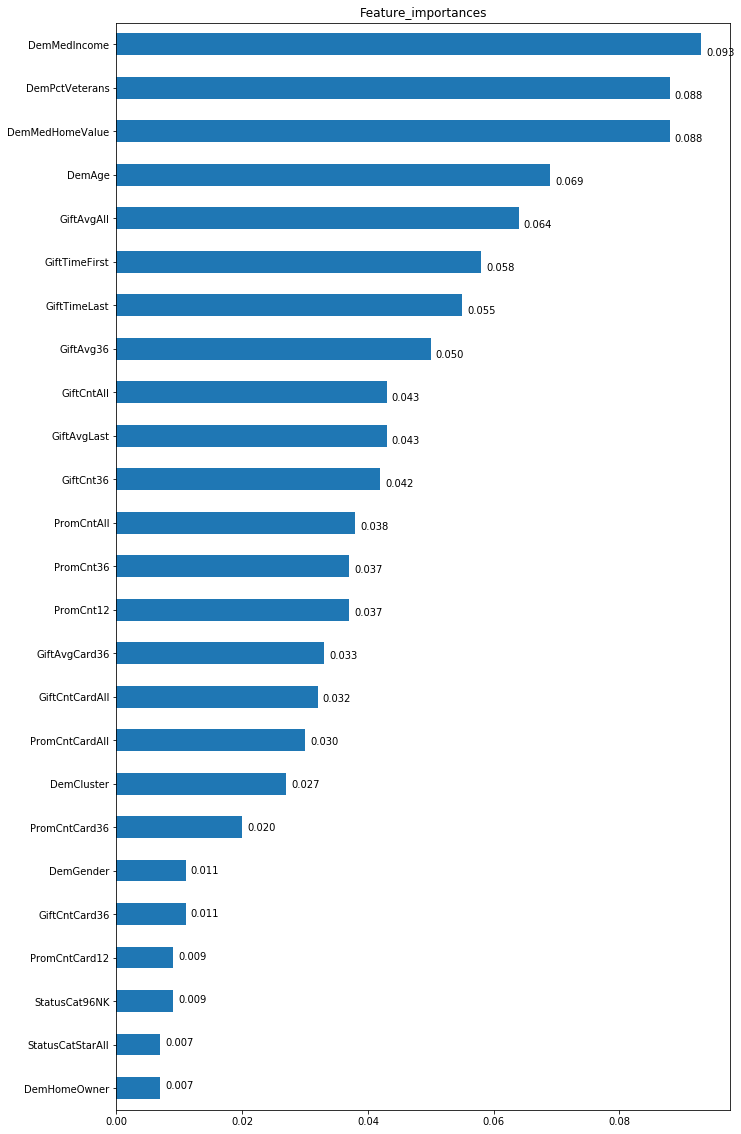

In [38]:
# create a horizontal bar chart(plot.barh)  
import matplotlib.pyplot as plt
%matplotlib inline
ax = dft2.plot.barh(title="Feature_importances", figsize=(11,20))
ax.get_legend().remove()   # legend box 제거.
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()*0.990),\
                xytext=(5, 10), textcoords='offset points')

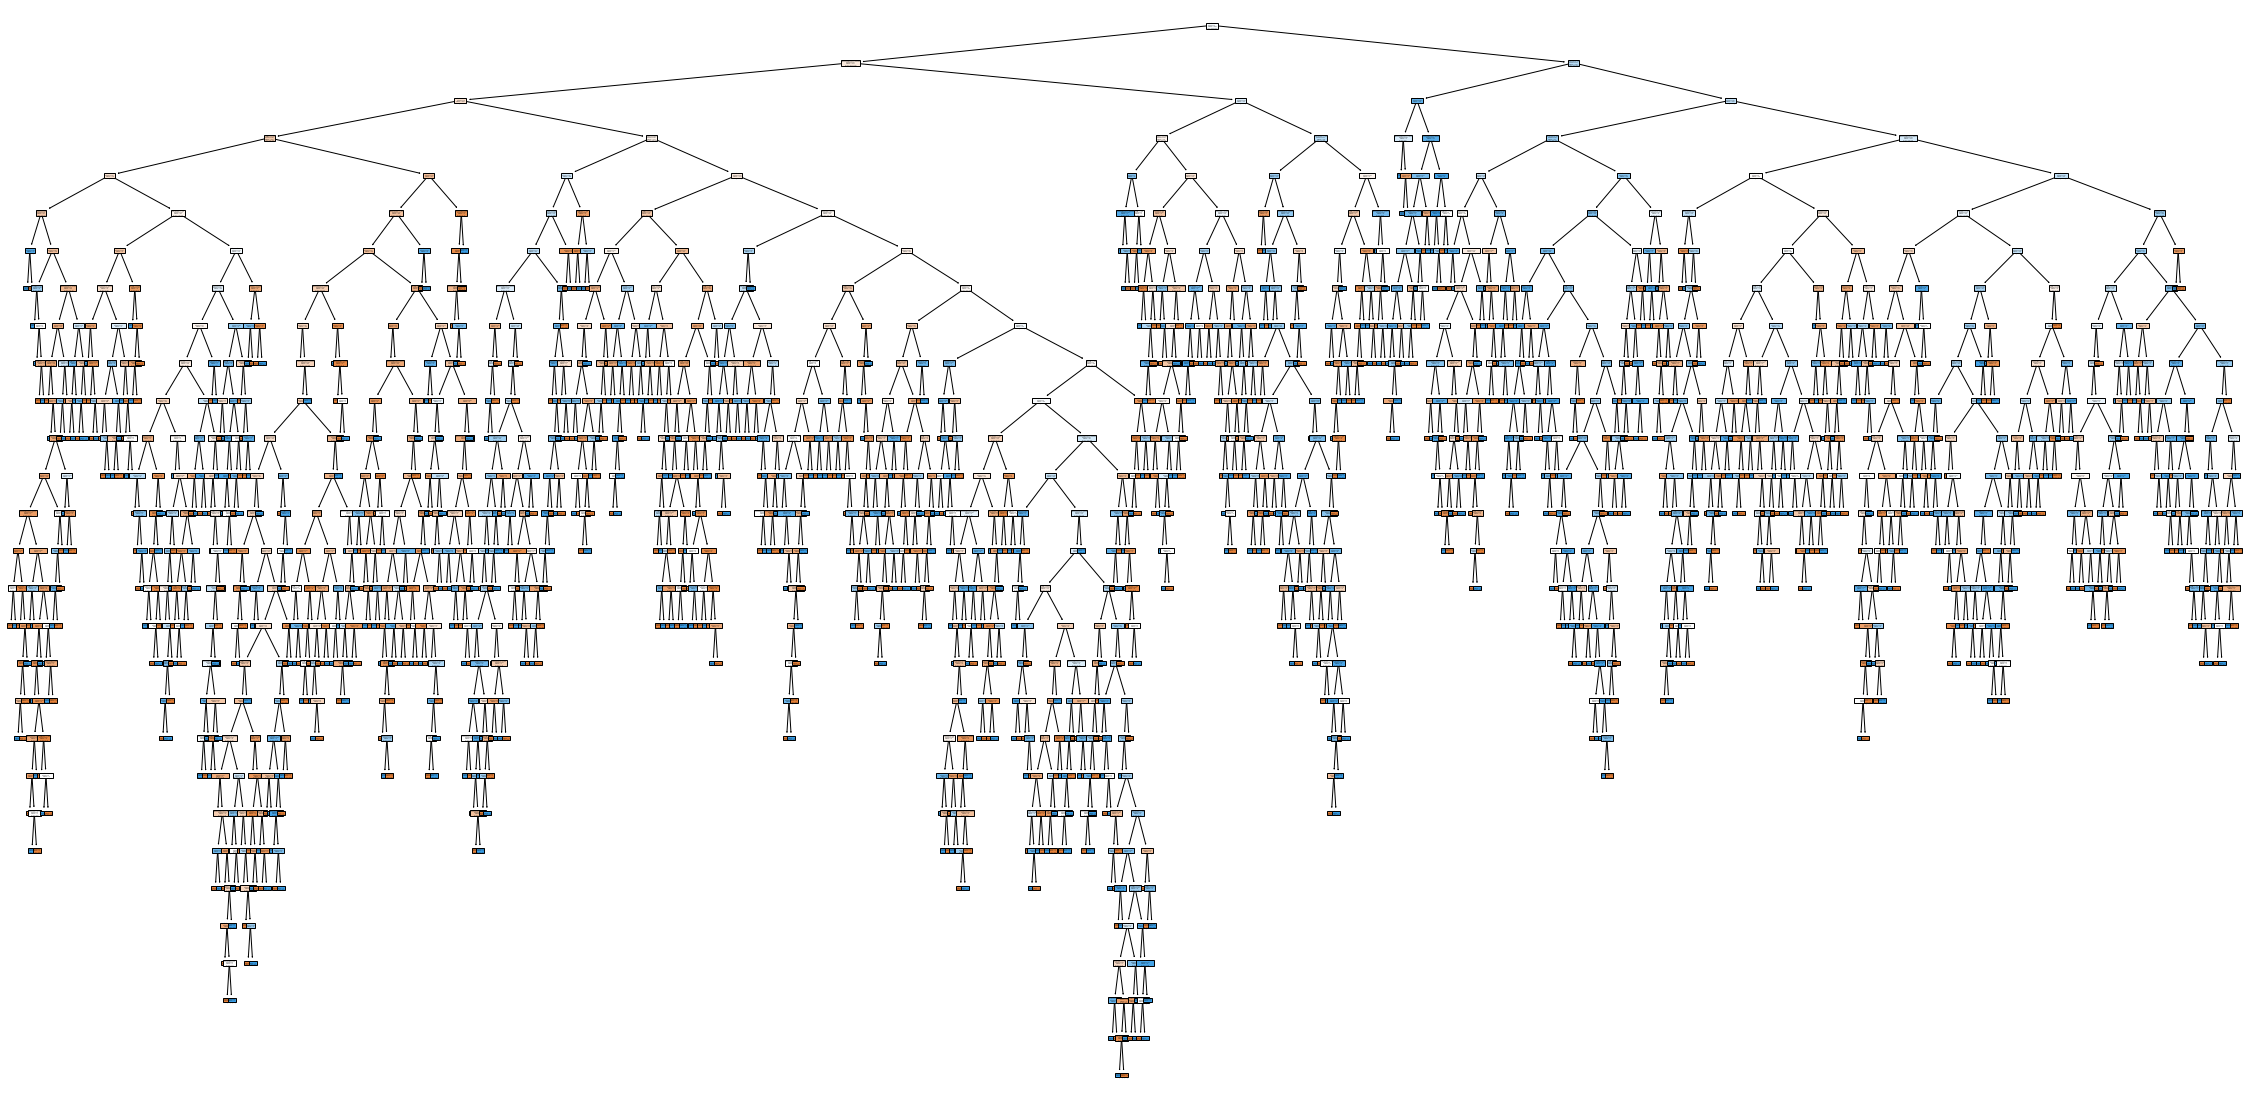

In [39]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(40, 20))
_=tree.plot_tree(dtc,
                   feature_names=list(data.columns),  
                   filled=True)

# Comparison between Gini vs. Entropy Tree
### Gini =  CART(calssification and regression tree)
### Entropy = C5.0
### Chi-squred = CHAID (chi-squared automatic interaction detection)

In [40]:
# Decision Tree Max Model (Criterion as Default = GINI (i.e., CART(calssification and regression tree))

tree = DecisionTreeClassifier(random_state = 0) 
tree.fit(X_train, y_train)

print("Accuracy on training set:{:.5f}".format(tree.score(X_train,y_train))) 
print("Accuracy on test set:{:.5f}".format(tree.score(X_test, y_test)))

Accuracy on training set:1.00000
Accuracy on test set:0.52798


In [41]:
# Decision Tree Max Model + criterion="entropy"
# FYI, SAS E Miner Decision Tree default criterion is chi-square. However, for Python Scikit-learn, it is GINI.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data, target, test_size=0.5, random_state=42) 
tree = DecisionTreeClassifier(criterion="entropy", random_state = 0) # Note that we use criterion="entropy" here.
tree.fit(X_train, y_train)

print("Entrophy Accuracy on training set:{:.5f}".format(tree.score(X_train,y_train))) 
print("Entrophy Accuracy on test set:{:.5f}".format(tree.score(X_test, y_test)))

Entrophy Accuracy on training set:1.00000
Entrophy Accuracy on test set:0.52096


# Now we are going to find the optimal depth of trees by comparing many depths' results.
It looks like depth 4 is the optimal depth.

In [42]:
# Decision Tree (Depth = 2)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 2, random_state = 0) 
tree.fit(X_train, y_train)

print("Depth 2, Accuracy on training set:{:.5f}".format(tree.score(X_train,y_train))) 
print("Depth 2, Accuracy on test set:{:.5f}".format(tree.score(X_test, y_test)))

Depth 2, Accuracy on training set:0.58332
Depth 2, Accuracy on test set:0.55276


In [43]:
# Decision Tree (Depth = 3)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 3, random_state = 0) 
tree.fit(X_train, y_train)

print("Depth 3 Entrophy criterion, Accuracy on training set:{:.5f}".format(tree.score(X_train,y_train))) 
print("Depth 3 Entrophy criterion, Accuracy on test set:{:.5f}".format(tree.score(X_test, y_test)))

Depth 3 Entrophy criterion, Accuracy on training set:0.58579
Depth 3 Entrophy criterion, Accuracy on test set:0.55276


In [44]:
# Decision Tree (Depth = 4)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4, random_state = 0) 
tree.fit(X_train, y_train)

print("Depth 4 Entrophy criterion, Accuracy on training set:{:.5f}".format(tree.score(X_train,y_train))) 
print("Depth 4 Entrophy criterion, Accuracy on test set:{:.5f}".format(tree.score(X_test, y_test)))

Depth 4 Entrophy criterion, Accuracy on training set:0.59736
Depth 4 Entrophy criterion, Accuracy on test set:0.55338


In [45]:
# Decision Tree (Depth = 5)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 5, random_state = 0) 
tree.fit(X_train, y_train)

print("Depth 5 Entrophy criterion, Accuracy on training set:{:.5f}".format(tree.score(X_train,y_train))) 
print("Depth 5 Entrophy criterion, Accuracy on test set:{:.5f}".format(tree.score(X_test, y_test)))

Depth 5 Entrophy criterion, Accuracy on training set:0.60149
Depth 5 Entrophy criterion, Accuracy on test set:0.54656


In [46]:
# Decision Tree (Depth = 6)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 6, random_state = 0) 
tree.fit(X_train, y_train)

print("Depth 6 Entrophy criterion, Accuracy on training set:{:.5f}".format(tree.score(X_train,y_train))) 
print("Depth 6 Entrophy criterion, Accuracy on test set:{:.5f}".format(tree.score(X_test, y_test)))

Depth 6 Entrophy criterion, Accuracy on training set:0.62750
Depth 6 Entrophy criterion, Accuracy on test set:0.53913


In [47]:
# Decision Tree (Depth = 7)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 7, random_state = 0) 
tree.fit(X_train, y_train)

print("Depth 7 Entrophy criterion, Accuracy on training set:{:.5f}".format(tree.score(X_train,y_train))) 
print("Depth 7 Entrophy criterion, Accuracy on test set:{:.5f}".format(tree.score(X_test, y_test)))

Depth 7 Entrophy criterion, Accuracy on training set:0.63803
Depth 7 Entrophy criterion, Accuracy on test set:0.54119


# Using GridSearchCV to find the best model

In [48]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import train_test_split 
#X_train, X_test, y_train, y_test = train_test_split( 
#    data, target, test_size=0.5, random_state=42) 
tree = DecisionTreeClassifier(criterion="entropy", random_state = 0) # Note that we use criterion="entropy" here.
tree.fit(X_train, y_train)

print("Entrophy Accuracy on training set:{:.5f}".format(tree.score(X_train,y_train))) 
print("Entrophy Accuracy on test set:{:.5f}".format(tree.score(X_test, y_test)))

Entrophy Accuracy on training set:1.00000
Entrophy Accuracy on test set:0.52096


In [49]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[2,3,4,5,6,7,8,9,10]}

grid_e = GridSearchCV(tree, param_grid=params, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_e.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_e.best_score_))
print("GridSearchCV best parameter:", (grid_e.best_params_))  

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


GridSearchCV max accuracy:0.57568
GridSearchCV best parameter: {'max_depth': 3}


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.1s finished


In [50]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[2,3,4,5,6,7,8,9,10]}

grid_e = GridSearchCV(tree, param_grid=params, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_e.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_e.best_score_))
print("GridSearchCV best parameter:", (grid_e.best_params_))  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits
GridSearchCV max accuracy:0.57568
GridSearchCV best parameter: {'max_depth': 3}


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.5s finished


In [51]:

df1.to_csv('pva97nk_ch3_result1.csv', index=False)

# The following codes for display decision trees graphically.
Currntly, the codes below will result in error called 'No module named 'graphviz'.
Because we need to change our computer setting outside of Python, the following codes alone will not work.
Thus, please use google search to solve this problem. 
In my case, one Macbook can run these codes and the other Macbook cannot due to the difference of OS version.
I guess this is the price of using open-source programs. Good Luck!

In [101]:
### For displaying grahpically of decision tree result!
### Which will cause error generally according to the compuster OS difference and OS version difference.
### Don't panic! Please refer to the google search to solve the error message here.

list(data.columns)

from sklearn.tree import export_graphviz 
export_graphviz(tree, out_file = "tree.dot",\
                feature_names = list(data.columns), impurity = False , filled = True ) 

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read() 
display(graphviz.Source(dot_graph)) 

ModuleNotFoundError: No module named 'graphviz'